# 6th Homework
## Theofanis Nitsos - p3352325

## Exercise 1
2, 3

## Exercise 2
3

## Exercise 3
4

## Exercise 4
4

## Exercise 5
1

## Exercise 6
1

## Exercise 7
1

## Exercise 8
2

## Exercise 9
1,4,5,7

## Exercise 10
1,3

## Exercise 11
4

## Exercise 12
2,3


## Exercise 13

The Lagrangian function is:   
$L(P_1, P_2, P_3) = \sum_{i=1}^{N} \sum_{j=1}^{3} P(j|x_i) ln P_j + \lambda (\sum_{j=1}^{3} P_j - 1)$

Solving the equation $ \frac{\partial(L(P_1, P_2, P_3))}{\partial(P_j)} = 0$  
$ \frac{1}{P_1}\sum_{i=1}^{N} P(1|x_i) + \lambda = 0 \Rightarrow P_1 = -\frac{1}{\lambda}\sum_{i=1}^{N} P(1|x_i)$ (13.1)  
the same apply for the rest of the $P_j$

Using the equation $\sum_{j=1}^{3} P_j = 1$  
$ P_1 + P_2 + P_3 = 1 \Rightarrow -\frac{1}{\lambda}\sum_{i=1}^{N} P(1|x_i) + -\frac{1}{\lambda}\sum_{i=1}^{N} P(2|x_i) + -\frac{1}{\lambda}\sum_{i=1}^{N} P(3|x_i) = 1 \Rightarrow$  

$\Rightarrow \lambda = - (\sum_{i=1}^{N} P(1|x_i) + \sum_{i=1}^{N} P(2|x_i) + \sum_{i=1}^{N} P(3|x_i)) = - \sum_{i=1}^{N} \sum_{j=1}^{3} P(j|x_i)$ (13.2)   

Substituting 13.2 to 13.1 we have
$ P_1 = -\frac{1}{\lambda}\sum_{i=1}^{N} P(1|x_i) = \frac{1}{\sum_{i=1}^{N} \sum_{j=1}^{3}P(j|x_i)} \sum_{i=1}^{N} P(1|x_i) $  

it holds that $ \sum_{j=1}^{3}P(j|x_i) = 1 $ thus   

$ \Rightarrow P_1 = \frac{1}{\sum_{i=1}^{N} 1} \sum_{i=1}^{N} P(1|x_i) = \frac{1}{N} \sum_{i=1}^{N} P(1|x_i)$ generalising this expression  
$ \Rightarrow P_j = \frac{1}{N} \sum_{i=1}^{N} P(j|x_i)$



## Exercise 14

Since we are working with normal distributions  
$ p(x_i|j;\mu_j) = \frac{1}{(2\pi)^j |\Sigma_j|^{1/2}} exp \left(-\frac{(x-\mu_j)^T \Sigma_{j}^{-1} (x-\mu_j)}{2} \right)$

for diagonal covariance matrix

$ p(x_i|j;\mu_j) = \prod_{i=1}^{N} \left(\frac{1}{\sqrt{2 \pi \sigma_j^2}} exp(-\frac{(x_i-\mu_j)^2}{2 \sigma_j^2}) \right) \Rightarrow$  
$ \Rightarrow ln p(x_i|j;\mu_j) = -\sum_{i=1}^{N} \left( ln \frac{1}{\sqrt{2 \pi \sigma_j^2}} + \frac{(x_i - \mu_j)^2}{2 \sigma_j^2} \right)$  
$ \frac{\partial \sum_{i=1}^N P(j|x_i) ln(p(x_i|j;m_j)}{\partial \mu_j} = 0 \Rightarrow$  
$ \Rightarrow \frac{\partial \sum_{i=1}^N P(j|x_i) ln(p(x_i|j;m_j)}{\partial \mu_j} = \frac{\partial \sum_{i=1}^N P(j|x_i) \left(- ln \frac{1}{\sqrt{2 \pi \sigma_j^2}} + \frac{(x_i - \mu_j)^2}{2 \sigma_j^2} \right)}{\partial \mu_j} =
\sum_{i=1}^N P(j|x_i) \left(\frac{(x_i - \mu_j)}{ \sigma_j^2} \right) = \sum_{i=1}^N P(j|x_i)x_i - \sum_{i=1}^N P(j|x_i)\mu_j \Rightarrow $  
$ \Rightarrow \sum_{i=1}^N P(j|x_i)x_i - \sum_{i=1}^N P(j|x_i)\mu_j = 0 \Rightarrow \sum_{i=1}^N P(j|x_i)x_i = \sum_{i=1}^N P(j|x_i)\mu_j \Rightarrow $  
$ \Rightarrow \mu_j = \frac{\sum_{i=1}^N P(j|x_i)x_i}{\sum_{i=1}^N P(j|x_i)}$

## Exercise 15

#### $X_1$ dataset Parametric approach

In [29]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from mpl_toolkits import mplot3d
from sklearn.neighbors import KernelDensity

Dataset = sio.loadmat('Dataset.mat')
X1 = Dataset['X1']
X2 = Dataset['X2']

Our data looks like they are gathered around one cluster. Therefore in the Gaussian Mixture function we will set n_components equal to 1.

In [30]:
# Parametric approach

gm_1 = GaussianMixture(n_components=1, random_state=0).fit(X1)
mean = gm_1.means_
cov = gm_1.covariances_

x_1 = np.array([[2.01, 2.99, 3.98 , 5.02],[20.78, -15.26, 19.38, -25.02],[3.08, 3.88, 4.15, 6.02]])

for i, x_i in enumerate(x_1):
    cov_norm = np.linalg.norm(cov)**1/2
    cov_inv = np.linalg.inv(cov)
    x_mu = x_i - mean
    print(f"p(x{i+1}): = ", f"{(1/ ( (2*np.pi)**2 * cov_norm )) * np.exp(-0.5 *
    (x_mu).dot(cov_inv).dot((x_mu).T))[0][0][0]:.4f}")


p(x1): =  0.0051
p(x2): =  0.0000
p(x3): =  0.0030


#### Non Parametric approach

We will use the Krnel Density Method from scikit-learn library.

In [39]:
def parzen_window_est(x_samples, h, center):
    dimensions = x_samples.shape[1]

    assert (len(center) == dimensions), 'Number of center coordinates have to match sample dimensions'
    k = 0
    for x in x_samples:
        is_inside = 1
        for axis,center_point in zip(x, center):
            if np.abs(axis-center_point) > (h/2):
                is_inside = 0
        k += is_inside
    return f"{(k / len(x_samples)) / (h**dimensions):.4f}"

for i, x_i in enumerate(x_1):
    # print('p(x) =', parzen_window_est(X1, h=1))
    print(f"p(x{i+1}) = ", parzen_window_est(X1, 1, x_i))

p(x1) =  0.0060
p(x2) =  0.0000
p(x3) =  0.0020


#### $X_2$ dataset Parametric approach

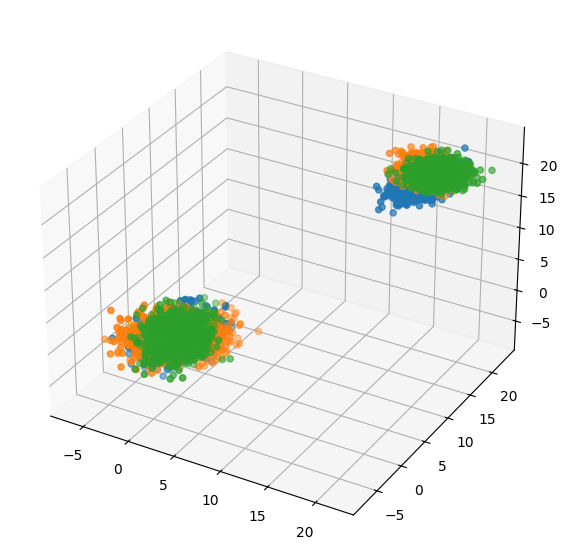

In [26]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X2[:,0], X2[:,1], X2[:,2])
ax.scatter3D(X2[:,0], X2[:,2], X2[:,3])
_ = ax.scatter3D(X2[:,1], X2[:,2], X2[:,3])

In [35]:
gm_2 = GaussianMixture(n_components=2, random_state=0).fit(X2)
mean = gm_2.means_
cov = gm_2.covariances_

x_2 = np.array([[0.05,0.15,-0.12,-0.08],[7.18,7.98,9.12,9.94],[3.48,4.01,4.55,4.96],[20.78,-15.26,19.38,-25.02]])

for i, x_i in enumerate(x_2):
    p1 = gm_2.predict_proba([x_2[0]])[0][0]
    p2 = gm_2.predict_proba([x_2[0]])[0][1]

    cov_norm_1, cov_norm_2 = np.linalg.norm(cov[0])**1/2, np.linalg.norm(cov[1])**1/2
    cov_inv_1, cov_inv_2 = np.linalg.inv(cov[0]), np.linalg.inv(cov[1])
    
    x_mu_1, x_mu_2 = x_i - mean[0], x_i - mean[1]
    p_x_1 = 1/ ( (2*np.pi)**2 * cov_norm_1 ) * np.exp(-0.5 * (x_mu_1).dot(cov_inv_1).dot((x_mu_1).T))

    p_x_2 = 1/ ( (2*np.pi)**2 * cov_norm_2 ) * np.exp(-0.5 * (x_mu_2).dot(cov_inv_2).dot((x_mu_2).T))
    
    P1_x = p1 * p_x_1 / (p1 * p_x_1 + p2 *p_x_2)
    P2_x = p2 * p_x_2 / (p1 * p_x_1 + p2 *p_x_2)
    print(f"p(x{i+1}): ", f"{p1 * p_x_1 + p2 *p_x_2:.4f}")

p(x1):  0.0050
p(x2):  0.0000
p(x3):  0.0000
p(x4):  0.0000


Non Parametric approach  
We will use the Krnel Density Method from scikit-learn library.

In [40]:
for i, x_i in enumerate(x_2):
    print(f"p(x{i+1}) = ", parzen_window_est(X2, 1, x_i))

p(x1) =  0.0005
p(x2) =  0.0000
p(x3) =  0.0000
p(x4) =  0.0000
